In [174]:
#importing the initial required libraries
#pandas for the data analysis which provided the multiple tool for this
#numpy using for the mathematical manipulation on array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [175]:
#read the history data
# here use the skip for if any badly formated lines then in this case skip that line and process to the next line
df = pd.read_csv('history.csv', on_bad_lines='skip')

In [176]:
#loding the data and showing the data
df

,order,id,date,time,title,url,visitCount,typedCount,transition
0,0,25343,1/14/2024,21:13:32,Export Chrome History,https://chromewebstore.google.com/detail/expor...,2,0,link
1,1,25343,1/14/2024,21:13:32,Export Chrome History,https://chromewebstore.google.com/detail/expor...,2,0,link
2,2,25336,1/14/2024,21:13:25,how a history file of the chrome history conve...,https://www.google.com/search?q=how+a+history+...,3,0,generated
3,3,25337,1/14/2024,21:13:02,How can i convert google chrome history to a ....,https://stackoverflow.com/questions/48382514/h...,1,0,link
4,4,25336,1/14/2024,21:12:58,how a history file of the chrome history conve...,https://www.google.com/search?q=how+a+history+...,3,0,link
...,...,...,...,...,...,...,...,...,...
8139,8139,23413,1/3/2024,1:00:31,(1091) The Hardest Days of Winter - YouTube,https://www.youtube.com/watch?v=jNqhUIYZM8Q,2,0,link
8140,8140,23412,1/3/2024,1:00:31,(1091) YouTube,https://www.youtube.com/,36,0,link
8141,8141,23412,1/3/2024,1:00:31,(1091) YouTube,https://www.youtube.com/,36,0,link
8142,8142,23412,1/3/2024,1:00:21,(1091) YouTube,https://www.youtube.com/,36,0,auto_bookmark


In [177]:
#know about the columns names
df.columns

Index(['order', 'id', 'date', 'time', 'title', 'url', 'visitCount',
       'typedCount', 'transition'],
      dtype='object')

In [178]:
# know about the unique transition
unique_transitions = df['transition'].unique()
print(unique_transitions)

['link' 'generated' 'form_submit' 'reload' 'auto_bookmark' 'typed'
 'auto_toplevel']


In [179]:
#unique title /domain of the chrome history
unique_titles = df['title'].unique()
print(unique_titles)

['Export Chrome History'
 'how a history file of the chrome history convert into the text online - Google Search'
 'How can i convert google chrome history to a .txt file using python - Stack Overflow'
 'Export Chrome History SQLite' 'ChatGPT' 'chatgpt - Google Search'
 'chatgpt detector - Google Search' '(1) Feed | LinkedIn'
 'IIT Kanpur Webmail :: ESC201 Tutorial_TA_Tutor_Room_Allotment.pdf'
 '(185) IIT Kanpur Webmail :: INBOX' 'IIT Kanpur Webmail :: INBOX'
 'Student Search - Raja Babu | IIT Kanpur'
 'prof arnab bose iitk - Google Search' 'Arnab Bose'
 'https://colab.research.google.com/drive/1R2t0hcmhLSAb2NlByAYJisxKoE_3_NLc?usp=sharing - Google Search'
 'Sectionwise Duty Final.xlsx' 'ESC201: INTRODUCTION TO ELECTRONICS'
 'India vs Afghanistan Live Streaming, 2nd T20: When and where to watch IND vs AFG match live? | Cricket News - The Indian Express'
 'Live Cricket Score, Schedule, Latest News, Stats &amp; Videos | Cricbuzz.com'
 'India vs Afghanistan, 2nd T20I, Today, Afghanistan t

In [180]:
#drop the columns because it is not necessary for my data analysis purpose
df = df.drop(['typedCount','id','order','transition','visitCount'], axis=1)


In [181]:
#after dropping the columns loading the data
df

,date,time,title,url
0,1/14/2024,21:13:32,Export Chrome History,https://chromewebstore.google.com/detail/expor...
1,1/14/2024,21:13:32,Export Chrome History,https://chromewebstore.google.com/detail/expor...
2,1/14/2024,21:13:25,how a history file of the chrome history conve...,https://www.google.com/search?q=how+a+history+...
3,1/14/2024,21:13:02,How can i convert google chrome history to a ....,https://stackoverflow.com/questions/48382514/h...
4,1/14/2024,21:12:58,how a history file of the chrome history conve...,https://www.google.com/search?q=how+a+history+...
...,...,...,...,...
8139,1/3/2024,1:00:31,(1091) The Hardest Days of Winter - YouTube,https://www.youtube.com/watch?v=jNqhUIYZM8Q
8140,1/3/2024,1:00:31,(1091) YouTube,https://www.youtube.com/
8141,1/3/2024,1:00:31,(1091) YouTube,https://www.youtube.com/
8142,1/3/2024,1:00:21,(1091) YouTube,https://www.youtube.com/


In [182]:
#make a new column Time which combine the date and time
df['Time'] = pd.to_datetime(df['date'] + ' ' + df['time'])

In [183]:
#now converting the columns name title to Domain and url to URL
df = df.rename(columns={'title': 'Domain', 'url': 'URL'})

In [184]:
#now drop the data and time columns because we already added the Time column
df = df.drop(['date', 'time'], axis=1)

In [185]:
# Now replace the columns names only for the good representation
df = df[['Time', 'URL', 'Domain']]

In [186]:
#load the data
df

,Time,URL,Domain
0,2024-01-14 21:13:32,https://chromewebstore.google.com/detail/expor...,Export Chrome History
1,2024-01-14 21:13:32,https://chromewebstore.google.com/detail/expor...,Export Chrome History
2,2024-01-14 21:13:25,https://www.google.com/search?q=how+a+history+...,how a history file of the chrome history conve...
3,2024-01-14 21:13:02,https://stackoverflow.com/questions/48382514/h...,How can i convert google chrome history to a ....
4,2024-01-14 21:12:58,https://www.google.com/search?q=how+a+history+...,how a history file of the chrome history conve...
...,...,...,...
8139,2024-01-03 01:00:31,https://www.youtube.com/watch?v=jNqhUIYZM8Q,(1091) The Hardest Days of Winter - YouTube
8140,2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube
8141,2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube
8142,2024-01-03 01:00:21,https://www.youtube.com/,(1091) YouTube


In [187]:
# Sort data by time for sequential analysis like 8:00 , 8:01,... etc
df = df.sort_values(by='Time')
# from this calculate the timespent on each website
df['TimeSpent'] = df.groupby('URL')['Time'].diff().dt.total_seconds()
# Displaying the time spent on each websites
website_time_spent = df.groupby('URL')['TimeSpent'].sum()
website_time_spent.head(10)

# in the output 0.0 means that user may be enter the website but not interact
# or may be page was loaded but did not give time

URL
chrome-extension://camppjleccjaphfdbohjdohecfnoikec/src/options/index.html                                                                                                                                                                                                                                                               2321.0
file:///C:/Users/HP/Downloads/387651721_1357211865193486_192586652735258096_n.webp                                                                                                                                                                                                                                                          0.0
http://172.26.142.68/examscheduler2/                                                                                                                                                                                                                                                                                                

In [188]:

# Calculate the time spent on each URL (DwellTime) in seconds
df['DwellTime'] = df.groupby('URL')['Time'].diff().dt.total_seconds()

# Fill NaN values in Dwelltime column with 0 that is  indicating no time spent
df['DwellTime'] = df['DwellTime'].fillna(0)

#showing the data
df.head(50)


,Time,URL,Domain,TimeSpent,DwellTime
8143,2024-01-03 01:00:21,https://www.youtube.com/,(1091) YouTube,NaN,0.0
8142,2024-01-03 01:00:21,https://www.youtube.com/,(1091) YouTube,0.0,0.0
8140,2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube,10.0,10.0
8138,2024-01-03 01:00:31,https://www.youtube.com/watch?v=jNqhUIYZM8Q,(1091) The Hardest Days of Winter - YouTube,NaN,0.0
8141,2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube,0.0,0.0
8139,2024-01-03 01:00:31,https://www.youtube.com/watch?v=jNqhUIYZM8Q,(1091) The Hardest Days of Winter - YouTube,0.0,0.0
8137,2024-01-03 01:01:27,https://www.youtube.com/,(1091) YouTube,56.0,56.0
8136,2024-01-03 01:01:27,https://www.youtube.com/,(1091) YouTube,0.0,0.0
8135,2024-01-03 01:03:29,https://www.youtube.com/results?search_query=h...,(1091) how to learn english speaking easily - ...,NaN,0.0
8134,2024-01-03 01:03:29,https://www.youtube.com/results?search_query=h...,(1091) how to learn english speaking easily - ...,0.0,0.0


In [189]:
# Changepy used for the change point detection
from changepy import pelt
# here take the value of dwelltime
X = df[['DwellTime']].values
# Define a cost function based on the maximum value within a segment
def cost(start, end):
    return np.max(X[start:end])
# Performing  change-point detection
result = pelt(cost, len(X), 10)
# Add a 'TransitionPoint' column to DataFrame
df['TransitionPoint'] = 0
df.loc[result[:-1], 'TransitionPoint'] = 1
# Displaying  the DataFrame with transition points
df.head(50)[['Time', 'URL', 'DwellTime', 'TransitionPoint']]


,Time,URL,DwellTime,TransitionPoint
8143,2024-01-03 01:00:21,https://www.youtube.com/,0.0,0
8142,2024-01-03 01:00:21,https://www.youtube.com/,0.0,0
8140,2024-01-03 01:00:31,https://www.youtube.com/,10.0,0
8138,2024-01-03 01:00:31,https://www.youtube.com/watch?v=jNqhUIYZM8Q,0.0,0
8141,2024-01-03 01:00:31,https://www.youtube.com/,0.0,0
8139,2024-01-03 01:00:31,https://www.youtube.com/watch?v=jNqhUIYZM8Q,0.0,0
8137,2024-01-03 01:01:27,https://www.youtube.com/,56.0,0
8136,2024-01-03 01:01:27,https://www.youtube.com/,0.0,0
8135,2024-01-03 01:03:29,https://www.youtube.com/results?search_query=h...,0.0,0
8134,2024-01-03 01:03:29,https://www.youtube.com/results?search_query=h...,0.0,0


In [190]:
#in filtered data if dwell time is 0 then remove that row
df_filtered = df[df['DwellTime'] != 0]

# showing the filtered data
df_filtered

,Time,URL,Domain,TimeSpent,DwellTime,TransitionPoint
8140,2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube,10.0,10.0,0
8137,2024-01-03 01:01:27,https://www.youtube.com/,(1091) YouTube,56.0,56.0,0
8128,2024-01-03 12:26:17,https://pingala.iitk.ac.in/IITK-0/logincheck,IITK,1.0,1.0,0
8127,2024-01-03 13:54:31,https://pingala.iitk.ac.in/IITK-0/login,IIT Kanpur,5320.0,5320.0,0
8126,2024-01-03 14:02:27,https://pingala.iitk.ac.in/IITK-0/logincheck,IITK,5770.0,5770.0,0
...,...,...,...,...,...,...
8,2024-01-14 21:06:30,https://chat.openai.com/,ChatGPT,22920.0,22920.0,0
7,2024-01-14 21:06:31,https://chat.openai.com/,ChatGPT,1.0,1.0,0
6,2024-01-14 21:06:37,https://chat.openai.com/c/8b65cc4f-3bea-4461-a...,Export Chrome History SQLite,75065.0,75065.0,0
4,2024-01-14 21:12:58,https://www.google.com/search?q=how+a+history+...,how a history file of the chrome history conve...,1.0,1.0,0


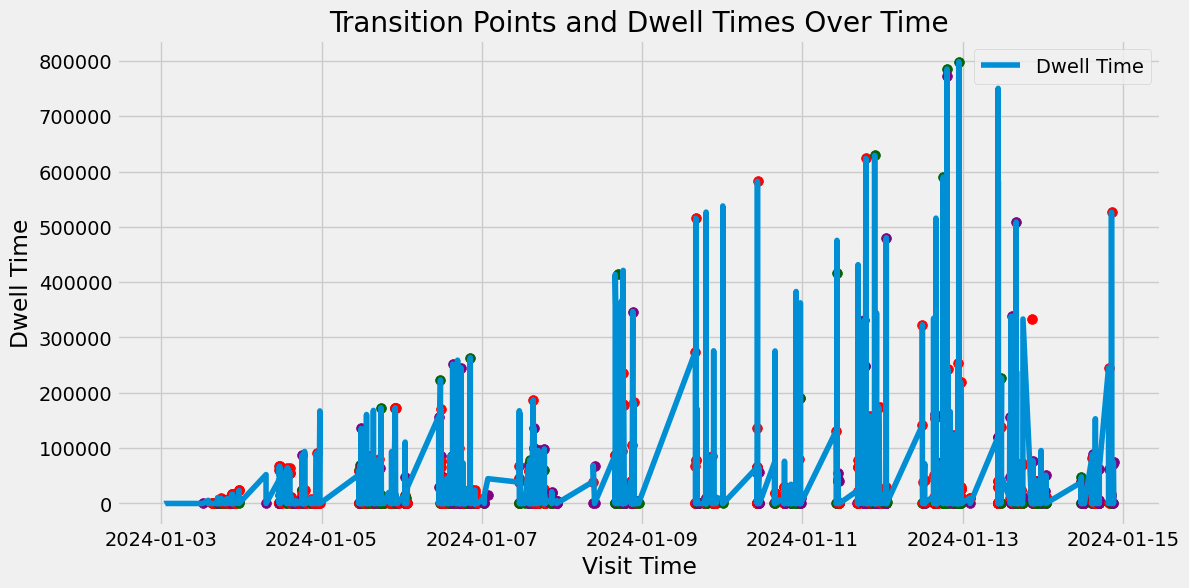

In [191]:
#some library , seanborn for data visualization
#CountVectorizer for a collection text change into matrix of tokens
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity

#preprocessing the data
documents = df_filtered['URL'].astype(str)

#lda for the topic modeling
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)
#transition point detection
similarity_matrix = cosine_similarity(X)
transition_points = [i for i in range(1, len(similarity_matrix)) if similarity_matrix[i-1, i] < 0.8]

#probabilistic characterization , by using this find the transition points and topic distribution
result_data = []

for transition_point in transition_points:
    current_topic_distribution = lda.transform(X[transition_point-1])
    dominant_topic = current_topic_distribution.argmax()
    current_dwell_time = df_filtered['DwellTime'].iloc[transition_point-1]
    weighted_topic_distribution = current_topic_distribution / current_dwell_time

    result_data.append({
        'Transition Point': transition_point,
        'Dominant Topic': dominant_topic,
        'Topic Distribution': current_topic_distribution,
        'Dwell Time': current_dwell_time,
        'Weighted Topic Distribution': weighted_topic_distribution
    })
# result data frame which has transition point, topic distribution, dwell time, weighted topic distribution
result_df = pd.DataFrame(result_data)
# plotting the graph between dwelltime and transition points
topic_colors = {0: 'red', 1: 'purple', 2: 'darkgreen'}
transition_point_color = 'black'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Time', y='DwellTime', label='Dwell Time')
for index, row in result_df.iterrows():
    color = transition_point_color if row['Dominant Topic'] == len(topic_colors) else topic_colors[row['Dominant Topic']]
    plt.scatter(
        df_filtered['Time'].iloc[row['Transition Point']],
        row['Dwell Time'],
        c=color,
        marker='o',
        s=50,
        label=None
    )

plt.title('Transition Points and Dwell Times Over Time')
plt.xlabel('Visit Time')
plt.ylabel('Dwell Time')
plt.legend()
plt.show()



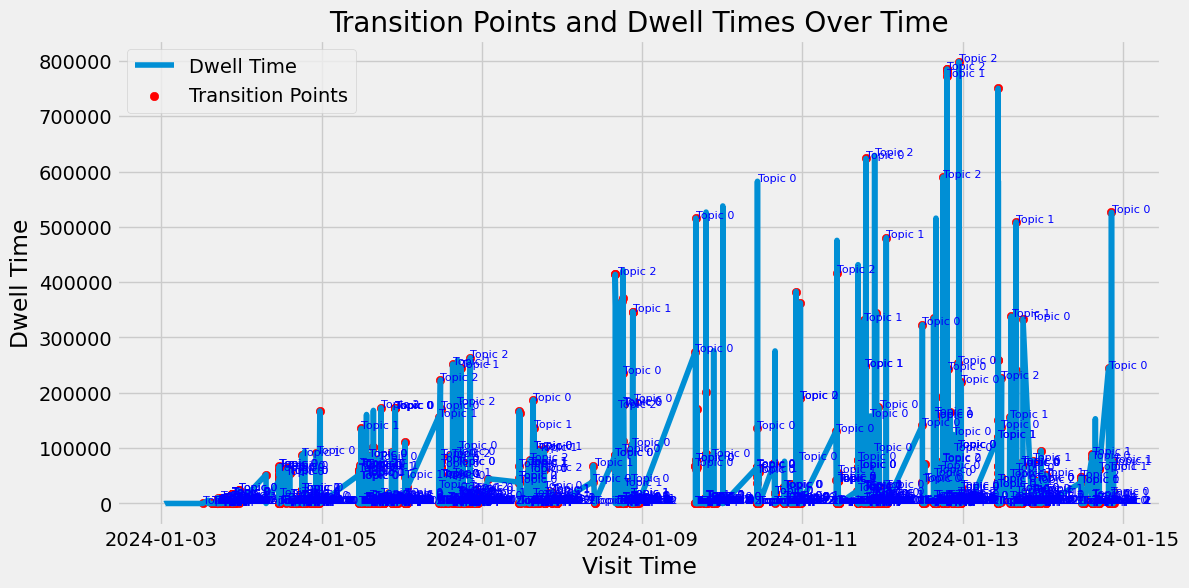

In [192]:
#here finding the dominant topic during the transition points and showing in the graph
result = []

for transition_point in transition_points:
    current_topic_distribution = lda.transform(X[transition_point-1])
    dominant_topic = current_topic_distribution.argmax()
    current_dwell_time = df_filtered['DwellTime'].iloc[transition_point-1]
    weighted_topic_distribution = current_topic_distribution / current_dwell_time

    result.append({
        'Transition Point': transition_point,
        'Dominant Topic': dominant_topic,
        'Topic Distribution': current_topic_distribution,
        'Dwell Time': current_dwell_time,
        'Weighted Topic Distribution': weighted_topic_distribution
    })

# result data frame which has transition point, topic distribution, dwell time, weighted topic distribution
result_df = pd.DataFrame(result)

#plotting the graph between dwelltime and transition points
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Time', y='DwellTime', label='Dwell Time')
plt.scatter(df_filtered['Time'].iloc[transition_points], df_filtered['DwellTime'].iloc[transition_points], color='red', label='Transition Points')
for index, row in result_df.iterrows():
    plt.text(df_filtered['Time'].iloc[row['Transition Point']], row['Dwell Time'], f'Topic {row["Dominant Topic"]}', fontsize=8, color='blue')

plt.title('Transition Points and Dwell Times Over Time')
plt.xlabel('Visit Time')
plt.ylabel('Dwell Time')
plt.legend()
plt.show()


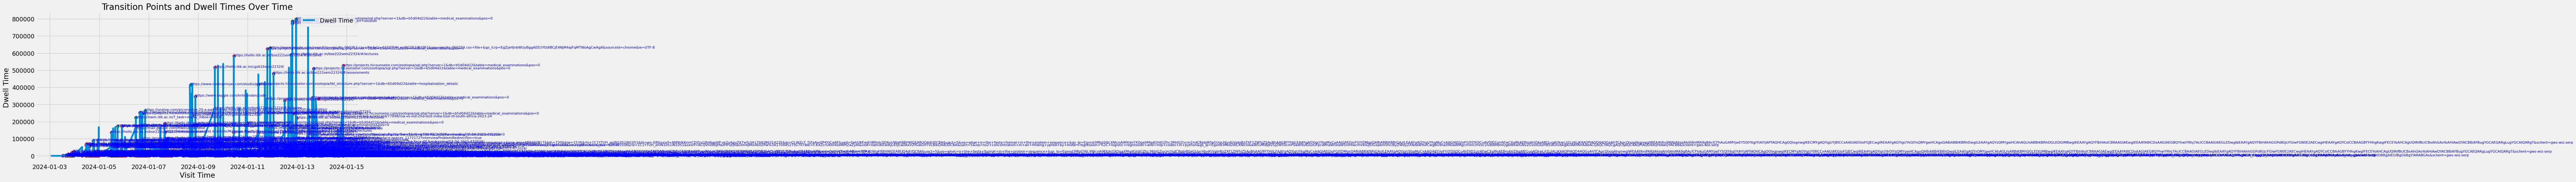

In [193]:

# find the location of the user within the topic at the time of transition
result_data = []

for transition_point in transition_points:
    current_topic_distribution = lda.transform(X[transition_point-1])
    dominant_topic = current_topic_distribution.argmax()
    current_dwell_time = df_filtered['DwellTime'].iloc[transition_point-1]
    weighted_topic_distribution = current_topic_distribution / current_dwell_time

    # Index of the most probable topic which exits within the topic
    most_probable_website_index = X.getrow(transition_point-1).toarray().argmax()

    result_data.append({
        'Transition Point': transition_point,
        'Dominant Topic': dominant_topic,
        'Most Probable Website': df_filtered['URL'].iloc[most_probable_website_index],
        'Topic Distribution': current_topic_distribution,
        'Dwell Time': current_dwell_time,
        'Weighted Topic Distribution': weighted_topic_distribution
    })

# result data frame,which has transition point, topic distribution, dwell time, weighted topic distribution
result_df = pd.DataFrame(result_data)

#plotting the graph between dwelltime and transition points with website name
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Time', y='DwellTime', label='Dwell Time')
for index, row in result_df.iterrows():
    color = topic_colors.get(row["Dominant Topic"], 'black')
    plt.scatter(
        df_filtered['Time'].iloc[row['Transition Point']],
        row['Dwell Time'],
        c=color,
        marker='o',
        s=50,
        label=None
    )

#annotating website in the graph
for index, row in result_df.iterrows():
    plt.text(
        df_filtered['Time'].iloc[row['Transition Point']],
        row['Dwell Time'],
        f'{row["Most Probable Website"]}',
        fontsize=8,
        color='blue'
    )

plt.title('Transition Points and Dwell Times Over Time')
plt.xlabel('Visit Time')
plt.ylabel('Dwell Time')
plt.legend()
plt.show()



In [194]:
result_df

,Transition Point,Dominant Topic,Most Probable Website,Topic Distribution,Dwell Time,Weighted Topic Distribution
0,2,1,https://projects.hicounselor.com/zootopia/sql....,"[[0.07053270809407168, 0.8575672647640812, 0.0...",56.0,"[[0.0012595126445369943, 0.01531370115650145, ..."
1,6,0,https://hello.iitk.ac.in/cgs616sem22324/#/reso...,"[[0.9135338373043401, 0.04255511606377691, 0.0...",1.0,"[[0.9135338373043401, 0.04255511606377691, 0.0..."
2,7,0,https://projects.hicounselor.com/zootopia/sql....,"[[0.5785800459307077, 0.33040425468683277, 0.0...",169.0,"[[0.0034235505676373235, 0.001955054761460549,..."
3,9,0,https://www.linkedin.com/events/medicaldataset...,"[[0.9655236032044563, 0.017432997496520504, 0....",96.0,"[[0.010057537533379754, 0.00018159372392208858..."
4,10,0,https://projects.hicounselor.com/zootopia/sql....,"[[0.5785800459307077, 0.33040425468683277, 0.0...",99.0,"[[0.005844242888188966, 0.0033374167140084116,..."
...,...,...,...,...,...,...
1337,2544,2,https://www.google.com/search?q=results_060253...,"[[0.042294243032145365, 0.03407599430585647, 0...",1.0,"[[0.042294243032145365, 0.03407599430585647, 0..."
1338,2545,1,https://projects.hicounselor.com/zootopia/sql....,"[[0.05800657041089184, 0.8831772626913815, 0.0...",71131.0,"[[8.154893142355913e-07, 1.2416207598534838e-0..."
1339,2546,2,https://assessment.hicounselor.com/,"[[0.019166656022984795, 0.020284654496564306, ...",1.0,"[[0.019166656022984795, 0.020284654496564306, ..."
1340,2548,1,https://projects.hicounselor.com/zootopia/inde...,"[[0.06978465248142932, 0.8608391924049327, 0.0...",1.0,"[[0.06978465248142932, 0.8608391924049327, 0.0..."


In [195]:
!pip install Changepy

In [196]:
#installing the stopwords dependency
!pip install stop_words


In [197]:
#importing the dependencies for the natural language processing
#tokenizer for the tokenization for the words
#stopwords like- the ,and ,is etc which is ignored during the search process
#genism use for the topic modelling means find the similarity in the given body of text
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [198]:
# for the tokenization
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer/ stemming
p_stemmer = PorterStemmer()

In [199]:
# make a list where add the processing text
texts = []

# Loop through document list in the DataFrame
for i in df['Domain']:
    try:
        i.encode()

        # first convert into the lower character then tokenize
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # Remove stop words from tokens
        stopped_tokens = [token for token in tokens if token.lower() not in en_stop]

        # Stemming the tokens
        stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]

        # Add tokens to list if there have error then add empty list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass

In [200]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [201]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)


In [202]:
#  the top terms for the three topics
ldamodel.print_topics(3)

[(0,
  '0.073*"colaboratori" + 0.067*"ipynb" + 0.034*"arvind_assign" + 0.028*"untitled3" + 0.027*"chatgpt" + 0.027*"comput" + 0.026*"esc201" + 0.026*"introduct" + 0.025*"electron" + 0.020*"cgs616"'),
 (1,
  '0.045*"project" + 0.043*"hicounselor" + 0.025*"com" + 0.023*"9" + 0.022*"phpmyadmin" + 0.022*"4" + 0.022*"leetcod" + 0.021*"5deb2" + 0.021*"localhost" + 0.020*"checker"'),
 (2,
  '0.127*"googl" + 0.087*"search" + 0.049*"kanpur" + 0.047*"iit" + 0.043*"webmail" + 0.026*"inbox" + 0.018*"185" + 0.014*"chrome" + 0.014*"histori" + 0.013*"iitk"')]

In [203]:
ldamodel.get_topic_terms(0,10)
# retrieve the top terms with their corresponding probability

[(344, 0.07345175),
 (469, 0.06719929),
 (1311, 0.0335754),
 (1073, 0.027685305),
 (371, 0.026957858),
 (85, 0.026753755),
 (90, 0.02601712),
 (91, 0.025899706),
 (89, 0.0251991),
 (87, 0.019586243)]

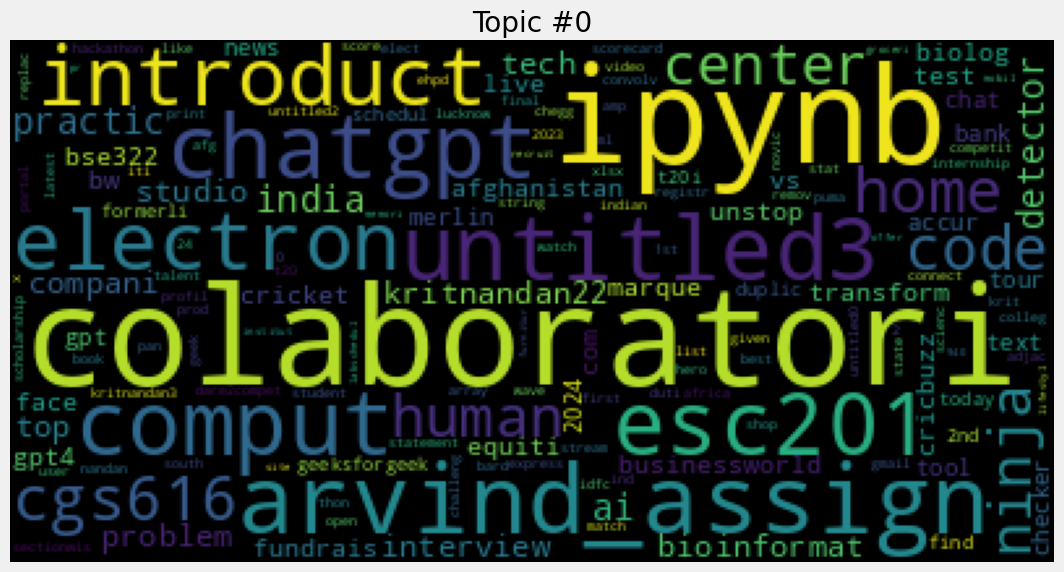

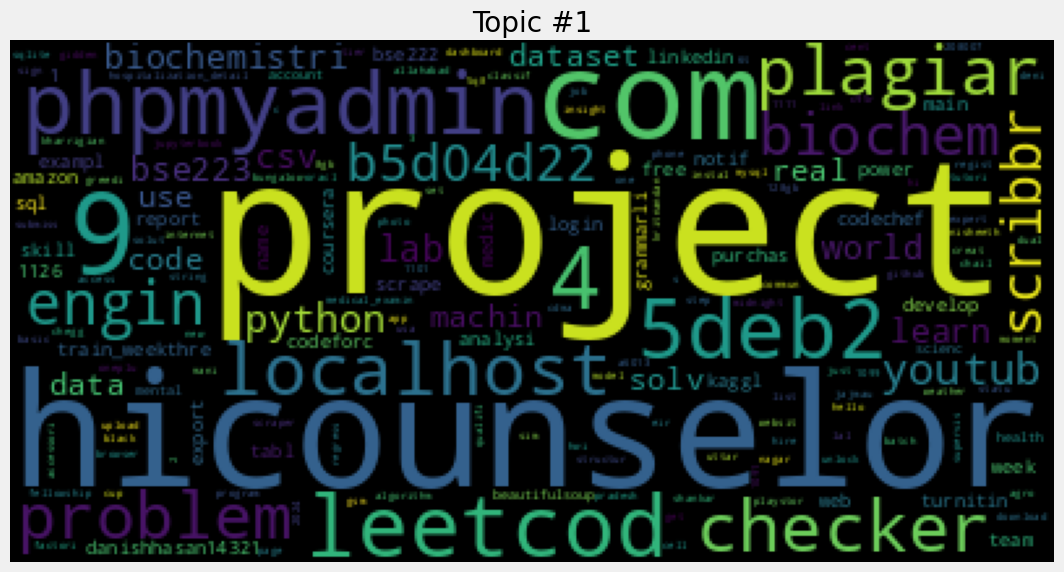

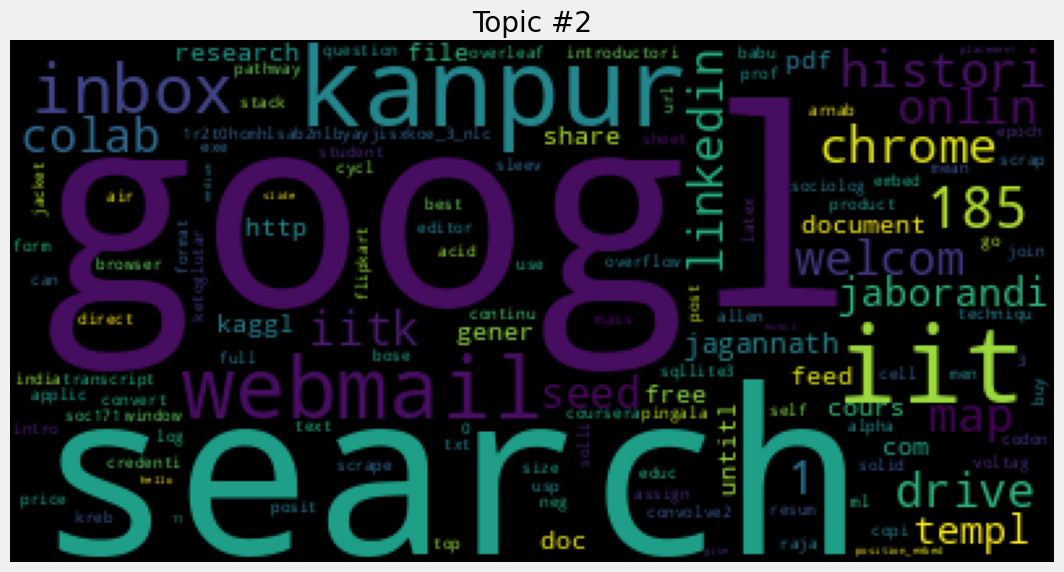

In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming ldamodel.show_topic(t, 200) returns a list of tuples (word, weight)
for t in range(ldamodel.num_topics):
    topic_words = dict(ldamodel.show_topic(t, 200))

    plt.figure(figsize=(12, 8))
    plt.imshow(WordCloud().fit_words(topic_words))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()




In [205]:
docs = df.Domain.unique()#for the unique documents

In [206]:
doc_set = docs.tolist()#unique documents covert into list

In [207]:
#calculating the topic probabilities and finding with highest probabilities
topic = [0]*len(df)
for idx in range(len(df)):
    test_idx = doc_set.index(df.Domain[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

In [208]:
df['Topic'] = topic


In [209]:
df.head()

,Time,URL,Domain,TimeSpent,DwellTime,TransitionPoint,Topic
8143,2024-01-03 01:00:21,https://www.youtube.com/,(1091) YouTube,NaN,0.0,0,0
8142,2024-01-03 01:00:21,https://www.youtube.com/,(1091) YouTube,0.0,0.0,0,0
8140,2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube,10.0,10.0,0,0
8138,2024-01-03 01:00:31,https://www.youtube.com/watch?v=jNqhUIYZM8Q,(1091) The Hardest Days of Winter - YouTube,NaN,0.0,0,0
8141,2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube,0.0,0.0,0,0


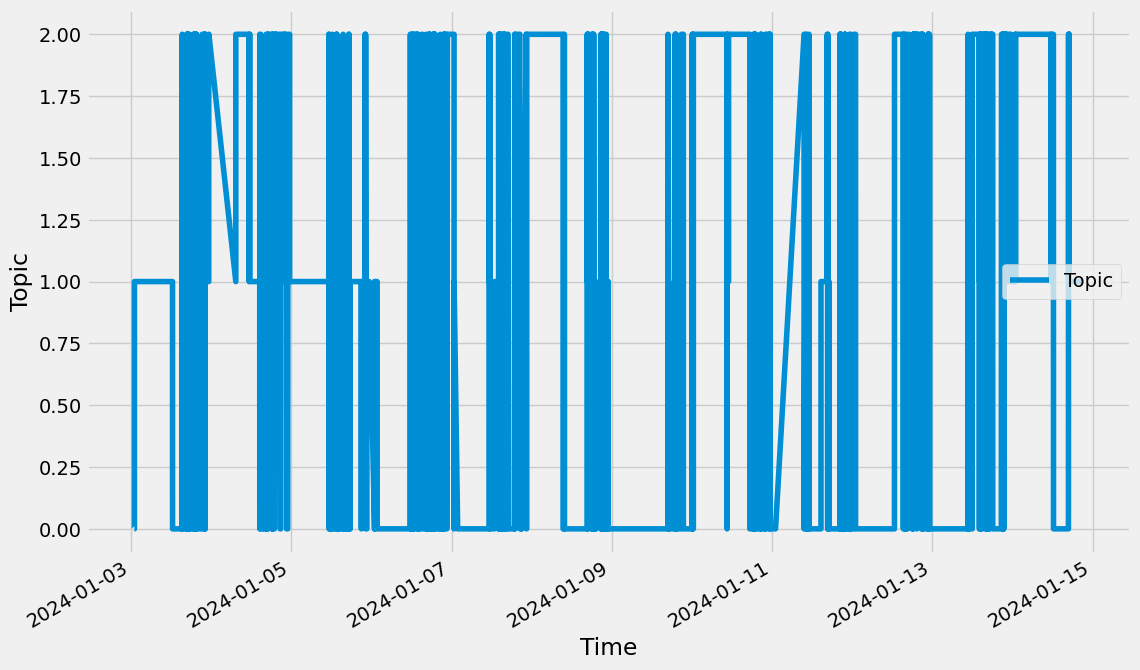

In [210]:
sorted_data = df.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.show()

In [211]:
cp_data = df

In [212]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

,URL,Domain,TimeSpent,DwellTime,TransitionPoint,Topic
Time,,,,,,
2024-01-03 01:00:21,https://www.youtube.com/,(1091) YouTube,NaN,0.0,0,0
2024-01-03 01:00:21,https://www.youtube.com/,(1091) YouTube,0.0,0.0,0,0
2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube,10.0,10.0,0,0
2024-01-03 01:00:31,https://www.youtube.com/watch?v=jNqhUIYZM8Q,(1091) The Hardest Days of Winter - YouTube,NaN,0.0,0,0
2024-01-03 01:00:31,https://www.youtube.com/,(1091) YouTube,0.0,0.0,0,0


In [213]:

occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in weekdays:
    tlist = cp_data[cp_data.index.day_name() == day].Topic.tolist()
    res = np.histogram(tlist, bins=[0, 1, 2, 3])
    occurrences.append(list(res[0]))

# Now 'occurrences' should contain the histograms for each weekday



In [214]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

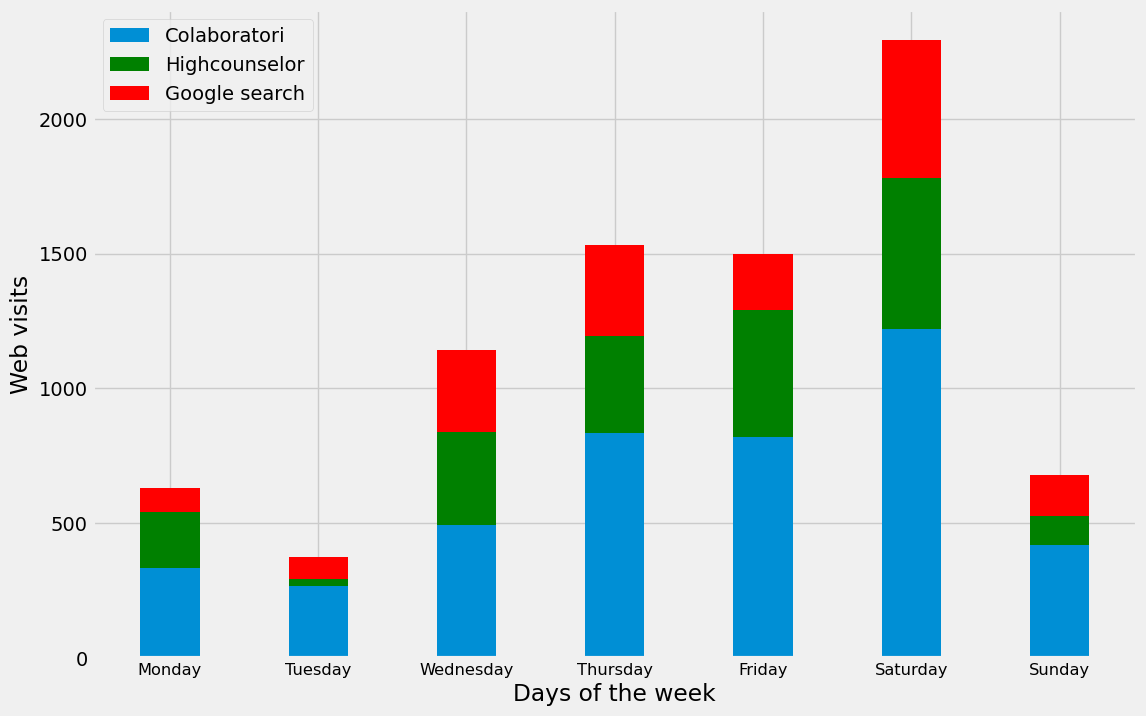

In [216]:
# showing the data for  week
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Colaboratori')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Highcounselor')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='Google search')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()